In [1]:
import tensorflow as tf
from tensorflow import keras
from tqdm.keras import TqdmCallback

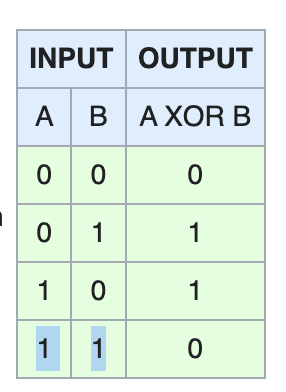

In [2]:
X = [[0,0],[0,1],[1,0],[1,1]]
Y = [[0],[1],[1],[0]]

In [25]:
# creating layers
inputs = tf.keras.Input(shape=(2,), name='input')
hidden1 = tf.keras.layers.Dense(2, activation='relu', name='hidden1')(inputs)
hidden2 = tf.keras.layers.Dense(2, activation='relu', name='hidden2')(hidden1)
output = tf.keras.layers.Dense(1, name='output')(hidden2)
# creating the model
model  = keras.Model(inputs, output, name='model')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 hidden1 (Dense)             (None, 2)                 6         
                                                                 
 hidden2 (Dense)             (None, 2)                 6         
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [26]:
# compiling the model
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.1)
loss      = tf.keras.losses.MeanSquaredError()
model.compile(optimizer, loss, metrics=['mae'])
model.fit(X, Y, epochs=500, verbose=0, callbacks=[TqdmCallback(verbose=1)])
# model.predict([[1,2]])

In [27]:
for i,x in enumerate(X):
    print(x,model.predict([x]).round(),Y[i])

1/1 [==============================] - 0s 59ms/step
[0, 0] [[0.]] [0]
1/1 [==============================] - 0s 32ms/step
[0, 1] [[1.]] [1]
1/1 [==============================] - 0s 33ms/step
[1, 0] [[0.]] [1]
1/1 [==============================] - 0s 32ms/step
[1, 1] [[0.]] [0]


### Por qu'e la sigmoide no funciona y la relu si para el problema XOR ? 